![Quick, Draw! Dataset](https://raw.githubusercontent.com/googlecreativelab/quickdraw-dataset/master/preview.jpg)

This exercise utilizes the [Quick, Draw!](https://github.com/googlecreativelab/quickdraw-dataset) dataset. It contains 50 million drawings across [345 categories](https://github.com/googlecreativelab/quickdraw-dataset/blob/master/categories.txt), contributed by players of the game Quick, Draw!. The drawings can be explored on https://quickdraw.withgoogle.com/data.

## Import Modules

In [1]:
from os import path                      # os level path manipulation
import numpy as np                       # array goodnes
from matplotlib import pyplot as plt     # plotting library
from tqdm import tqdm, trange            # progress bars
from keras.utils import get_file         # handy function to download data
from keras.utils import to_categorical   # Converts a class vector to binary class matrix.
from keras.preprocessing.image import ImageDataGenerator # data augmentation
from sklearn.model_selection import train_test_split

%matplotlib inline
plt.rcParams['figure.figsize'] = (12, 8) # set plot size

Using TensorFlow backend.


## Load Data

In [0]:
# https://console.cloud.google.com/storage/browser/quickdraw_dataset/full/numpy_bitmap
classes = [['airplane', 'https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/airplane.npy'],
           ['car',      'https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/car.npy'],
           ['bus',      'https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/bus.npy']]

X, Y = [], []
for idx, [class_name, url] in enumerate(classes):
  cn = path.split(url)[-1]
  fn = get_file(cn, url)
  d = np.load(fn)
  X.append(d)
  Y.append(np.ones((d.shape[0])) * idx)
X = np.concatenate(X, axis=0)
X = X.reshape((X.shape[0], 28, 28, 1))
X = X.astype(np.float32) / np.max(X)
Y = np.concatenate(Y, axis=0)
Y = to_categorical(Y)

X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.01, random_state=42)

## Display Training Images


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

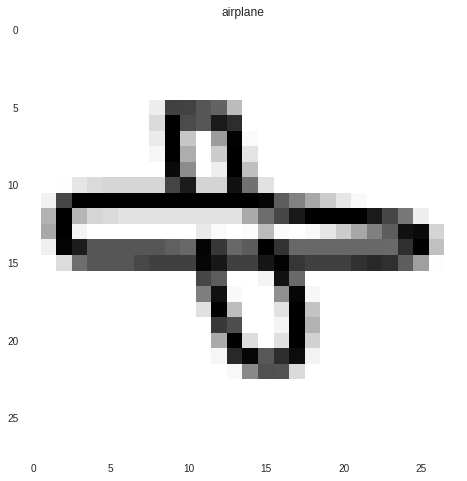

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

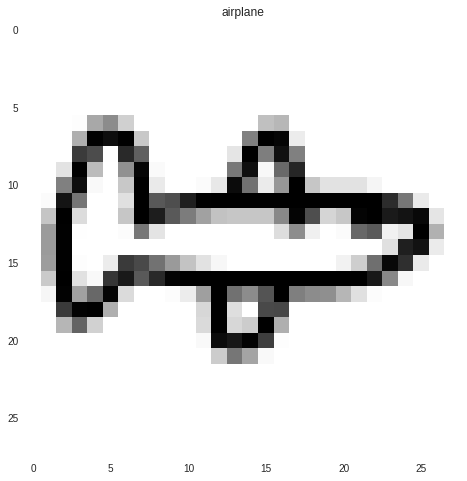

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

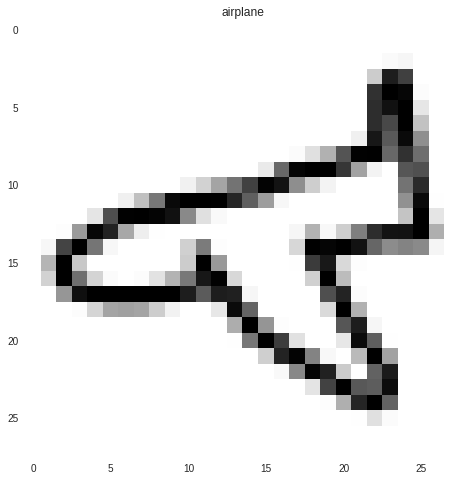

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

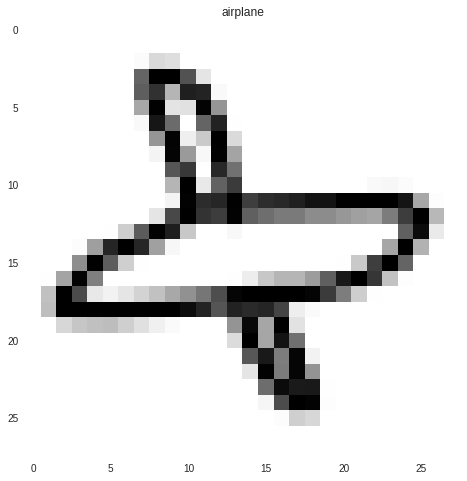

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

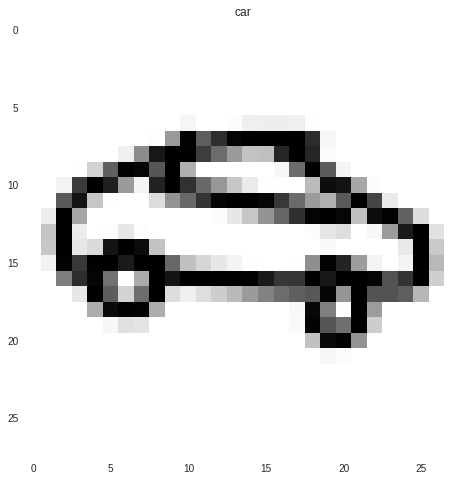

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

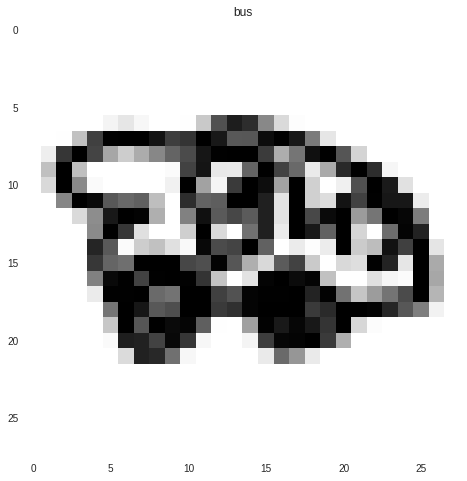

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

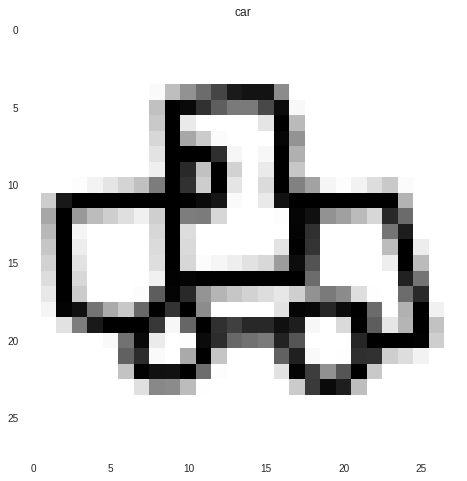

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

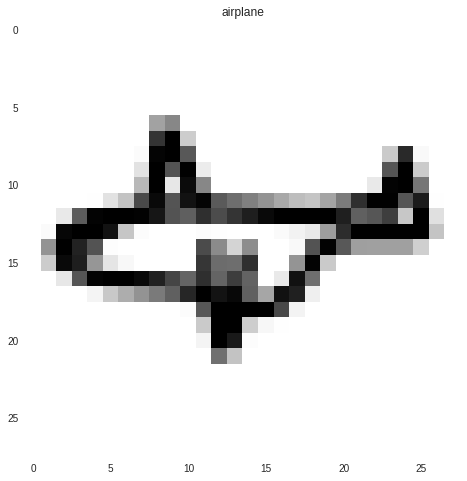

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

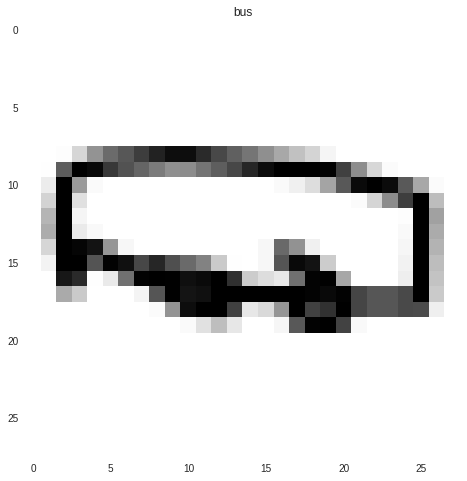

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

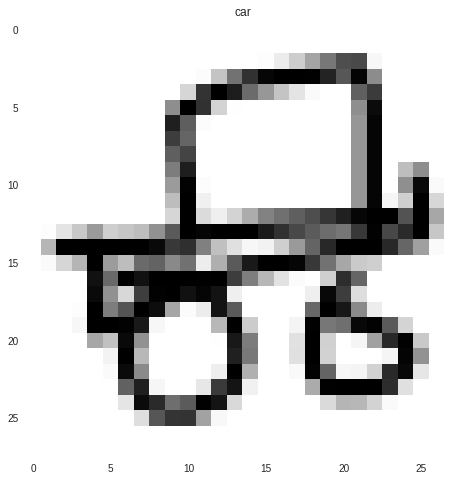

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

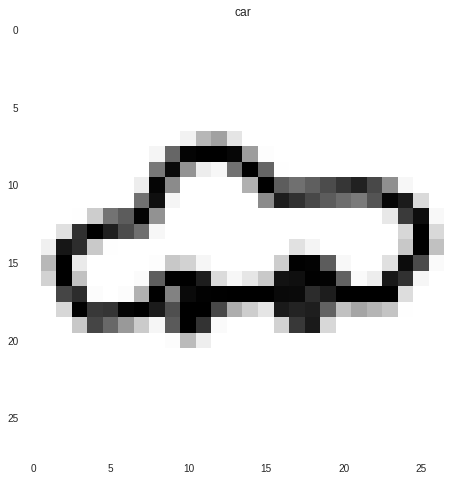

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

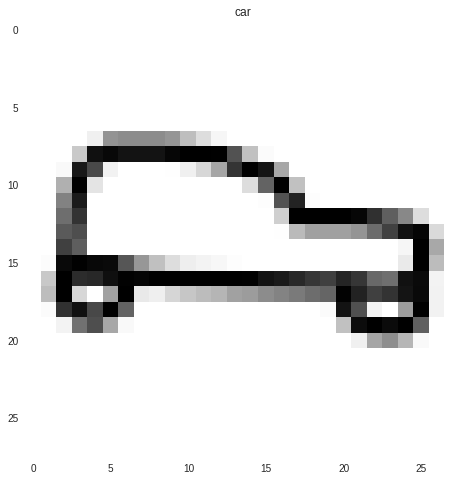

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

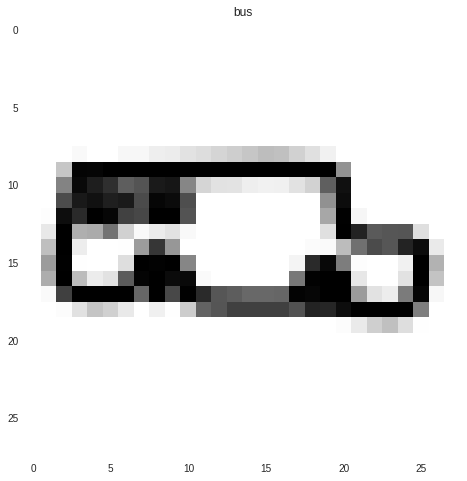

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

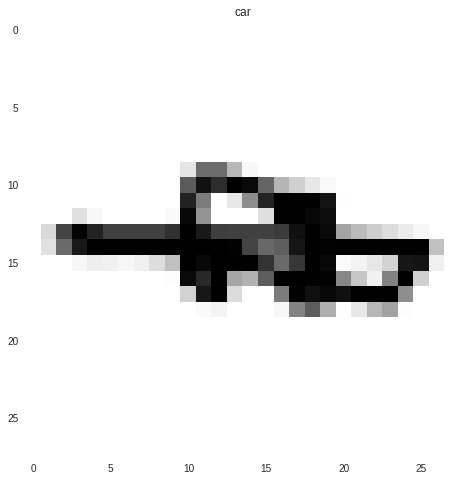

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

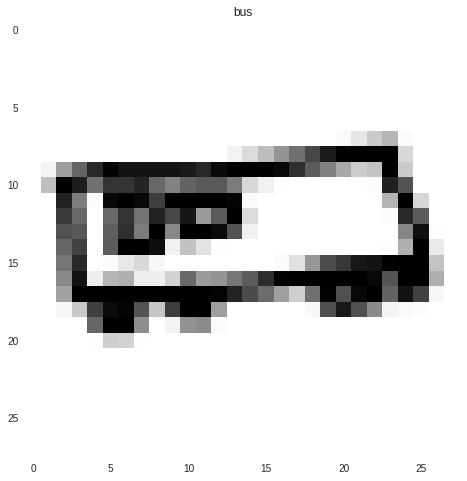

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

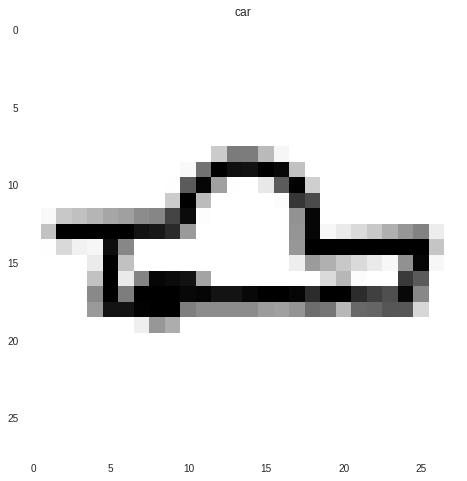

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

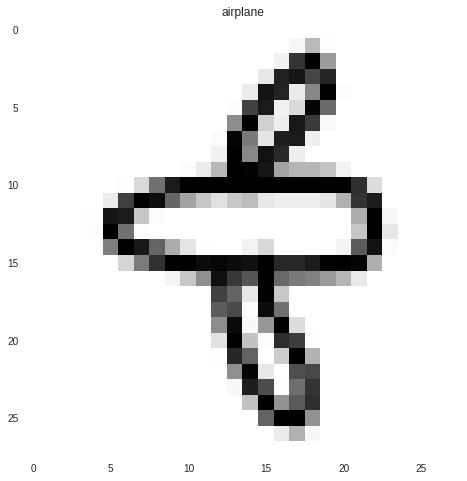

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

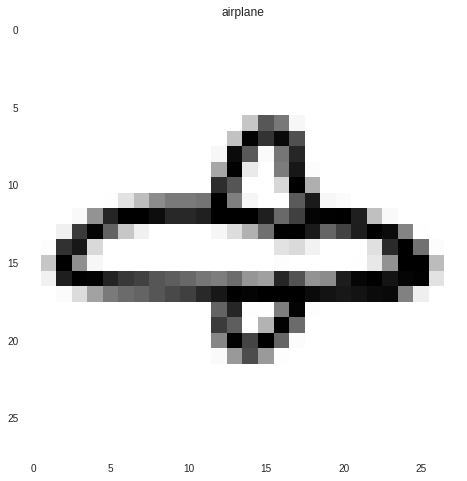

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

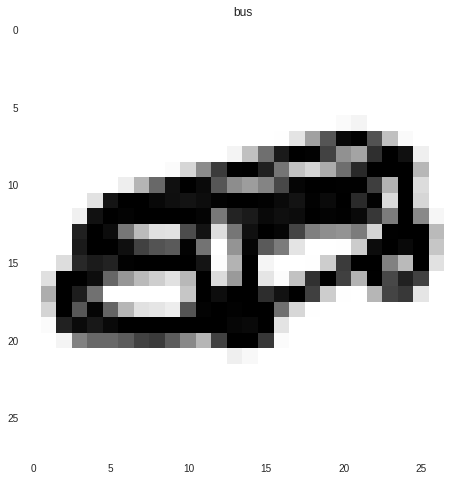

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

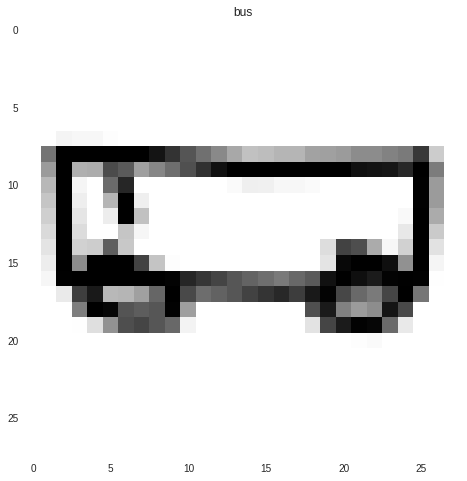

<IPython.core.display.Javascript object>

In [3]:
from google.colab import widgets

def plot(x, y, p=None, n=20):
  idxs = range(X_train.shape[0])
  tb = widgets.TabBar([str(i) for i in range(len(x))][:n], location='top')
  for i in range(len(x))[:n]:
    img = x[i,...,0]
    class_id = np.argmax(y[i])
    class_name = classes[class_id][0]
    if p is not None:
      pred_id = np.argmax(p[i])
      pred_name = classes[pred_id][0]
    else:
      pred_name = False
    with tb.output_to(i):
      fig, ax = plt.subplots(1)
      ax.imshow(img)
      caption = class_name
      if pred_name: caption += ' - prediction: %s' % pred_name
      ax.set_title(caption)
      ax.grid(False)

plot(X_train, Y_train)

## Define Network Topology

In [4]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten


model = Sequential()
model.add(Conv2D(64, 3, padding='valid', activation='relu', input_shape=(28,28,1)))
model.add(MaxPooling2D())
model.add(Conv2D(128, 3, padding='valid', activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(256, 3, padding='valid', activation='relu', name='last_conv'))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(len(classes), activation='sigmoid', name='inference'))


model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 128)         0         
_________________________________________________________________
last_conv (Conv2D)           (None, 3, 3, 256)         295168    
_________________________________________________________________
flatten_1 (Flatten)          (None, 2304)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               295040    
__________

## Train the Model

In [5]:
# image augmentation
datagen = ImageDataGenerator(
    rotation_range  = 10,
    zoom_range      = 0.1,
    horizontal_flip = True)

model.fit_generator(datagen.flow(X_train, Y_train, batch_size=32),
                    validation_data=[X_val, Y_val],
                    steps_per_epoch=200,
                    epochs=5)

Epoch 1/5
200/200 [==============================] - 6s 28ms/step - loss: 0.4257 - acc: 0.8277 - val_loss: 0.2574 - val_acc: 0.9103
Epoch 2/5
200/200 [==============================] - 4s 20ms/step - loss: 0.2673 - acc: 0.9041 - val_loss: 0.2028 - val_acc: 0.9279
Epoch 3/5
200/200 [==============================] - 4s 20ms/step - loss: 0.2424 - acc: 0.9131 - val_loss: 0.2357 - val_acc: 0.9247
Epoch 4/5
200/200 [==============================] - 4s 20ms/step - loss: 0.2226 - acc: 0.9197 - val_loss: 0.1894 - val_acc: 0.9367
Epoch 5/5
200/200 [==============================] - 4s 20ms/step - loss: 0.2082 - acc: 0.9269 - val_loss: 0.1738 - val_acc: 0.9429


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

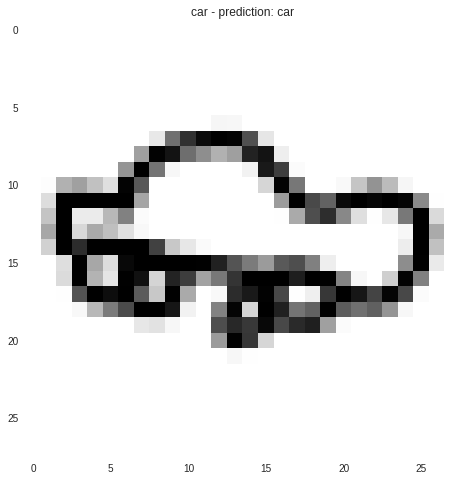

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

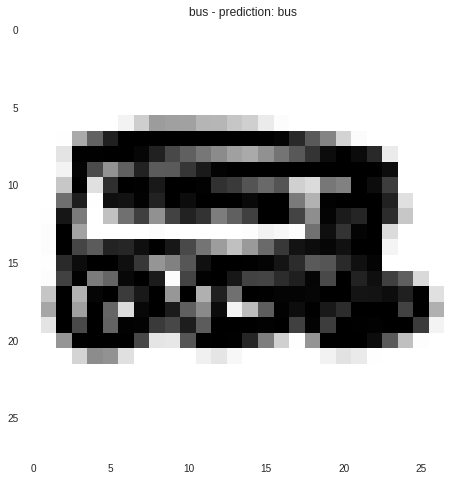

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

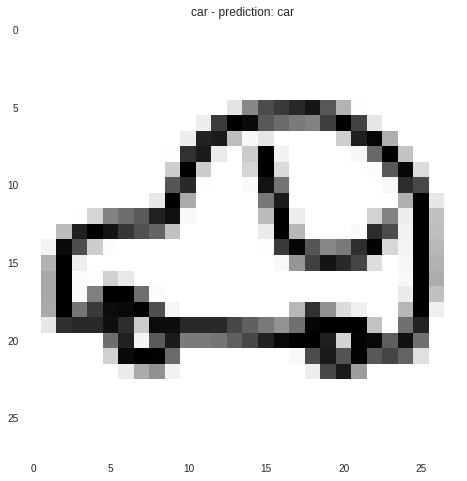

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

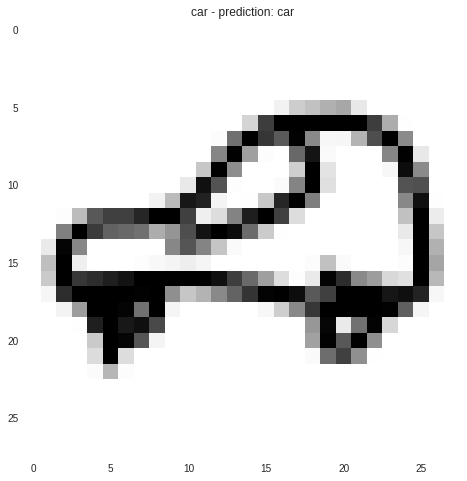

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

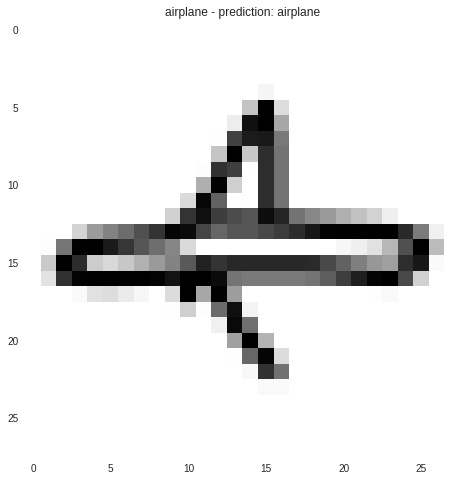

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

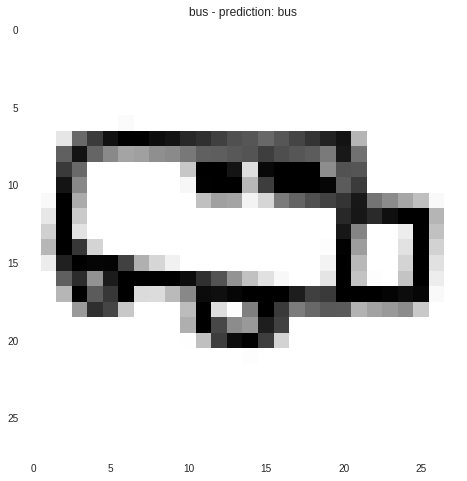

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

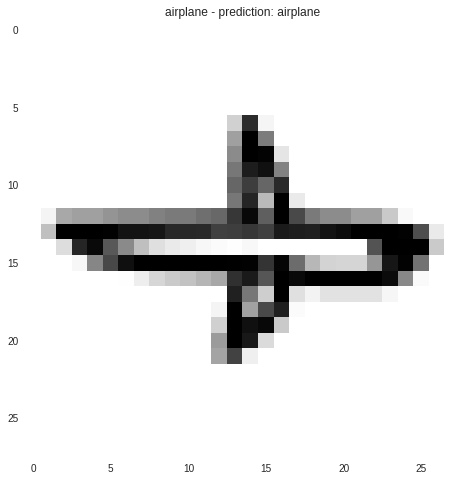

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

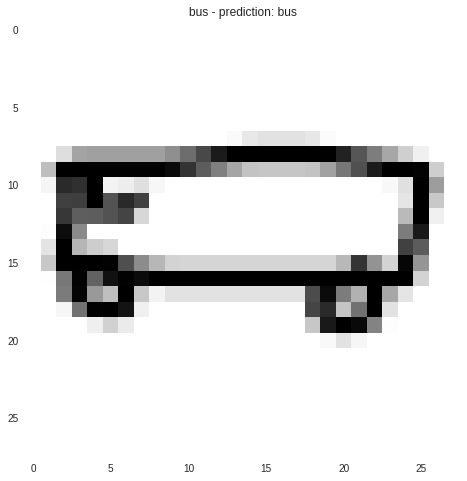

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

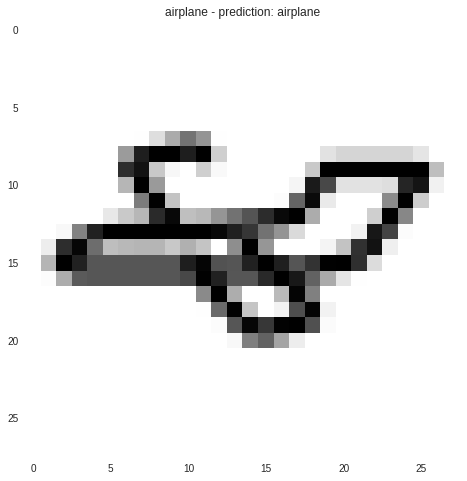

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

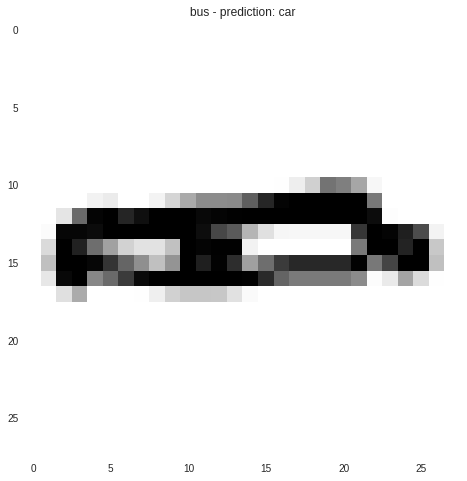

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

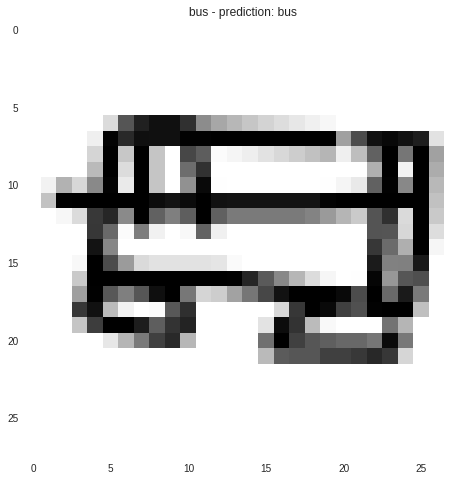

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

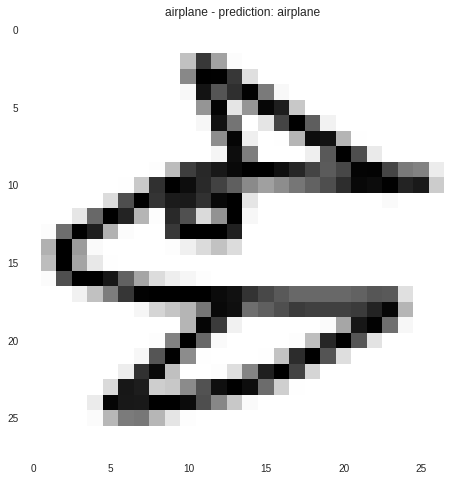

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

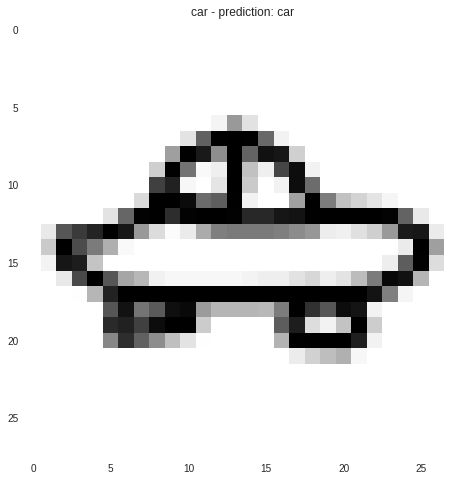

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

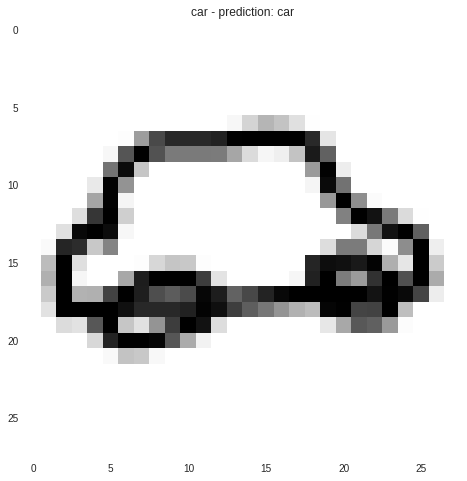

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

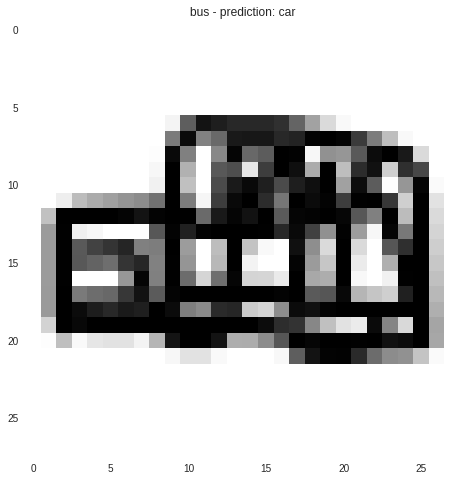

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

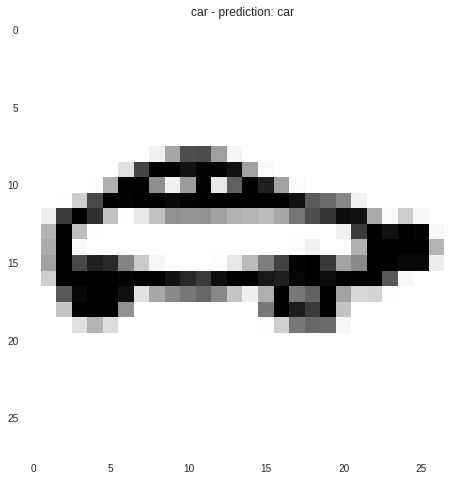

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

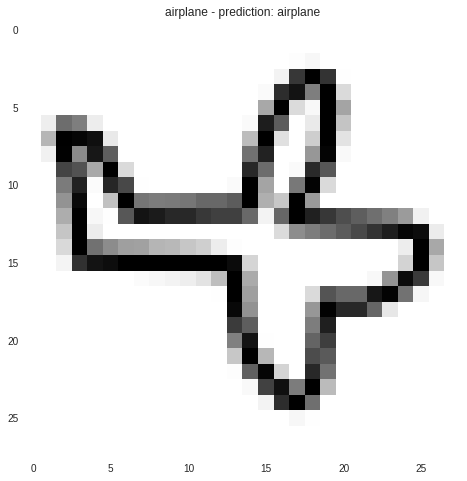

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

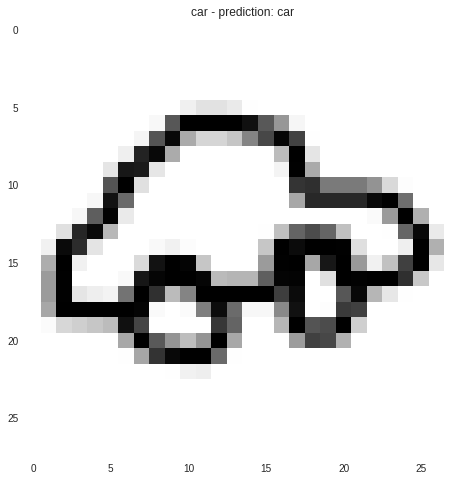

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

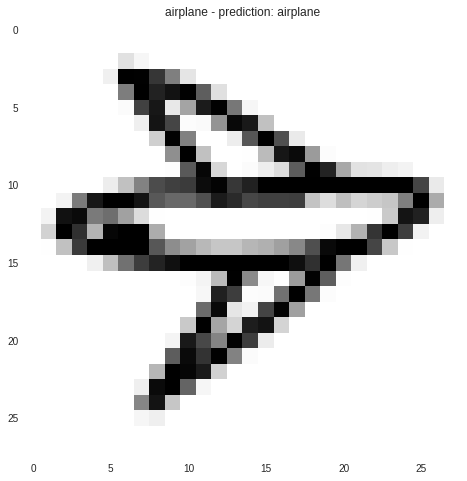

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

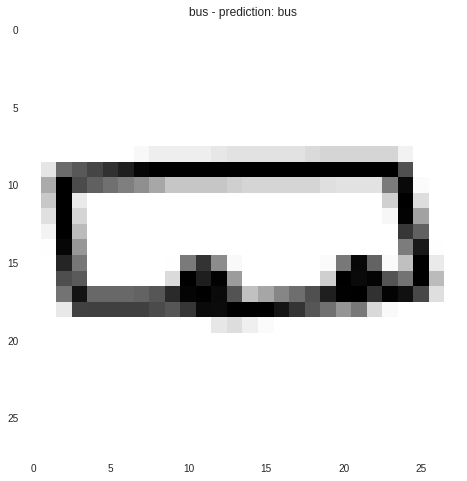

<IPython.core.display.Javascript object>

In [6]:
predictions = model.predict(X_val)
plot(X_val, Y_val, predictions)

## Class Activation Maps (CAMs)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

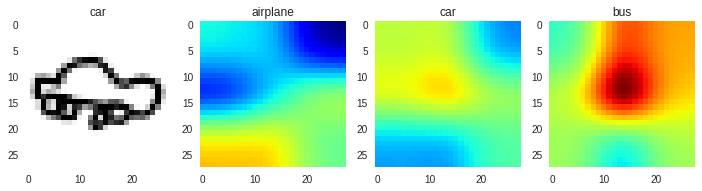

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

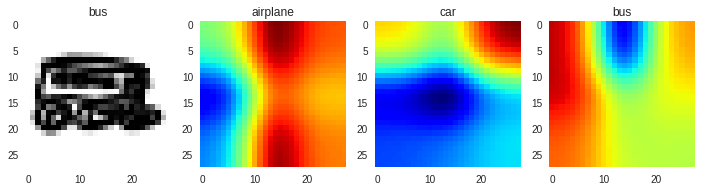

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

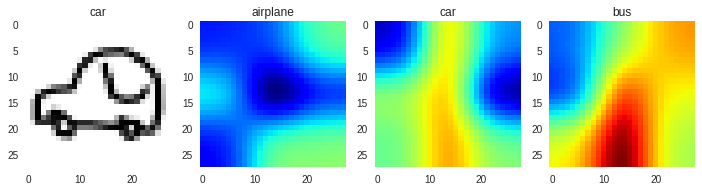

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

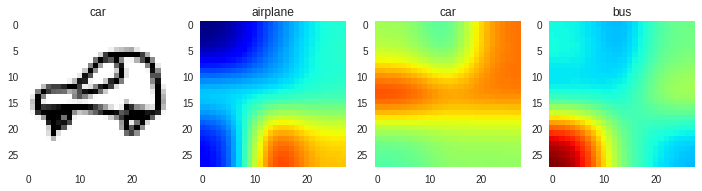

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

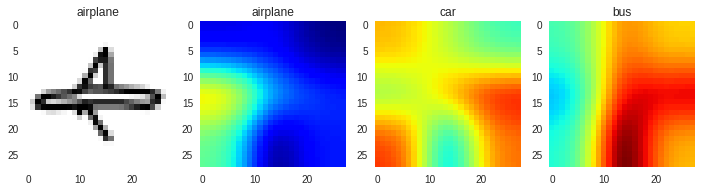

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

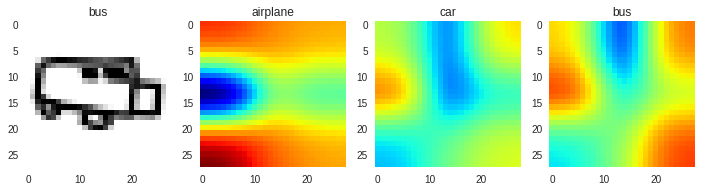

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

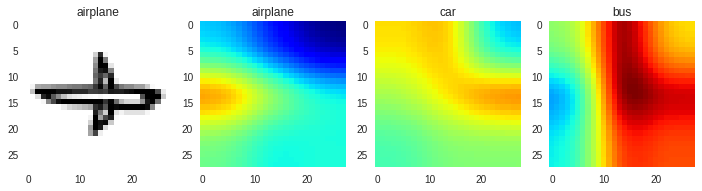

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

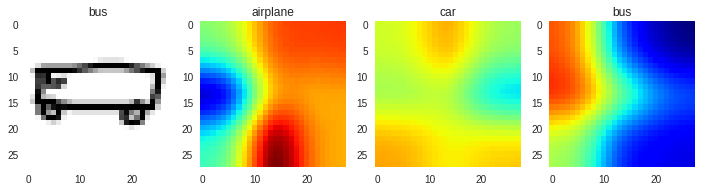

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

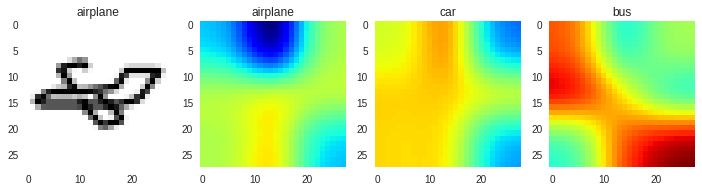

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

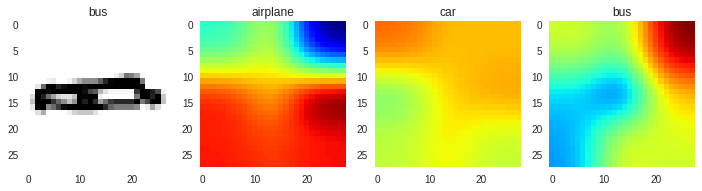

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

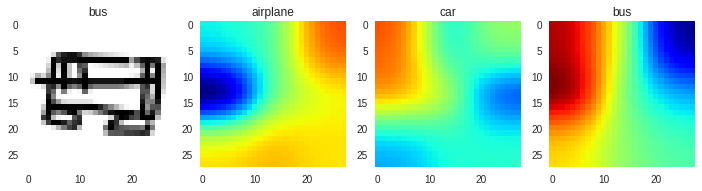

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

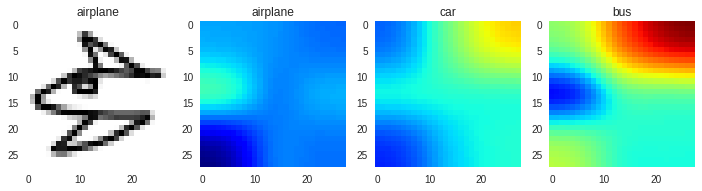

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

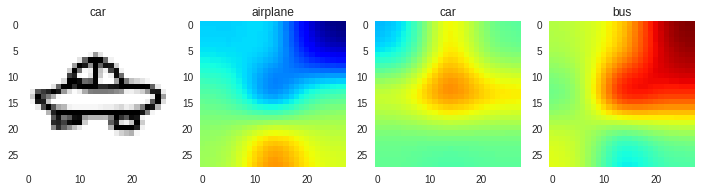

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

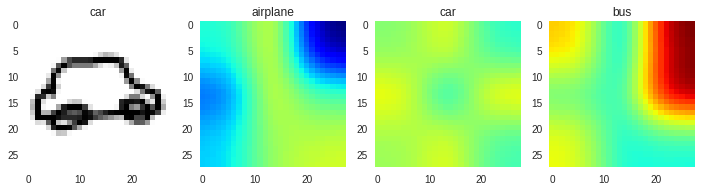

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

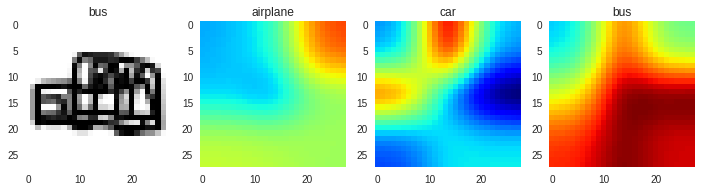

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

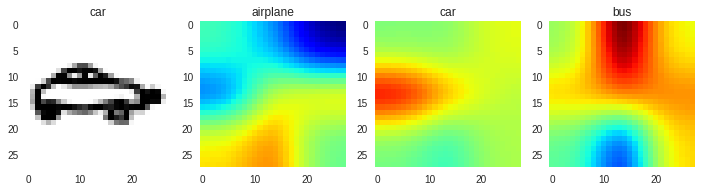

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

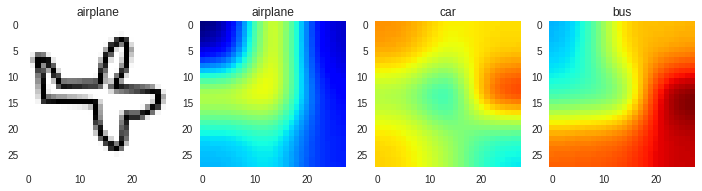

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

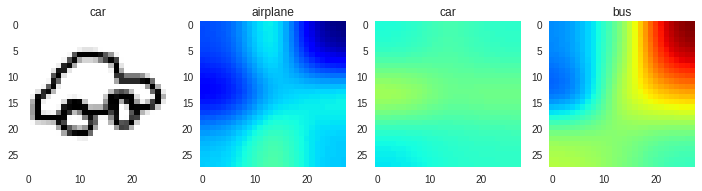

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

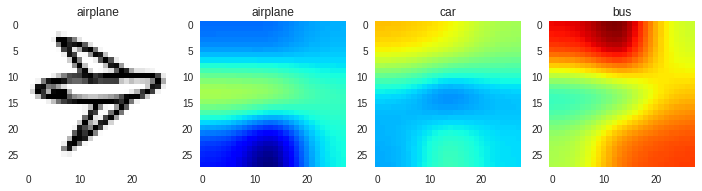

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

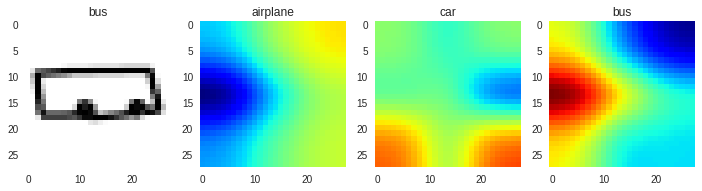

<IPython.core.display.Javascript object>

In [7]:
import keras.backend as K
import PIL
from skimage.exposure import rescale_intensity


def get_cam(model, img, final_conv_name, target_class, resize=True):
  img = img.reshape((1,)+img.shape)
  class_weights = model.layers[-1].get_weights()[0]
  final_conv_layer = model.get_layer(final_conv_name)
  get_output = K.function([model.layers[0].input], \
                          [final_conv_layer.output, 
                           model.layers[-1].output])
  [conv_outputs, predictions] = get_output([img])
  conv_outputs = conv_outputs[0]

  #Create the class activation map.
  cam = np.zeros(dtype = np.float32, shape = conv_outputs.shape[:-1])
  for i, w in enumerate(class_weights[..., target_class]):
    cam += w * conv_outputs[..., i]
  if resize:
    pimg = PIL.Image.fromarray(cam)
    return np.array(pimg.resize(img.shape[1:-1], PIL.Image.BICUBIC))
  else:
    return cam
    

def visualize_cam(model, x, y, final_conv_name, target_class, n=20):
  n_classes = len(y[0])
  tb = widgets.TabBar([str(i) for i in range(len(x))][:n], location='top')
  for idx in range(len(x))[:n]:
    img = x[idx]
    class_truth = np.argmax(y[idx])
    with tb.output_to(idx):
      fig, axs = plt.subplots(1, n_classes+1)
      axs[0].imshow(img[...,0])
      axs[0].set_title(classes[class_truth][0])
      cams = [get_cam(model, img, final_conv_name, target_class) for target_class in range(n_classes)]
      cams = rescale_intensity(np.array(cams), out_range=(-1.0, 1.0))
      for target_class in range(n_classes):
        axs[target_class+1].imshow(cams[target_class], cmap='jet', vmin=-1, vmax=1)
        axs[target_class+1].set_title(classes[target_class][0])
      for ax in axs:
        ax.grid(False)
  
   
visualize_cam(model, X_val, Y_val, 'last_conv', 1)

##  HANDS ON

First:  
Add additional categories, available on https://console.cloud.google.com/storage/browser/quickdraw_dataset/full/numpy_bitmap. How does this affect accuracy?

Secound:  
Tweak the neural network. Add additional layers. You can change the padding from "valid" to "same" to avoid losing resolution through convolutions.